In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # и другие метрики
from sklearn.cluster import KMeans # а также другие алгоритмы
from sklearn.preprocessing import StandardScaler

In [6]:
!ls

analysis.ipynb	dolgolets.tsv  students.tsv


In [7]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [8]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

In [9]:
dolgolets.columns



Index(['ID', 'Gender', 'Age', 'квота сек', 'Слово', 'Предыдущее + слово',
       'Стратегия', 'Первая_буква', 'Порядок_буква', 'Порядок_весь_тест',
       'Частотность', 'Пауза', 'VP', 'VS', 'N of words', 'N of words_P',
       'N of words_O', 'N of words_S', 'Mean pause'],
      dtype='object')

In [10]:
dolgolets = dolgolets[students.columns]

In [11]:
dolgolets['type'] = 'centenarians'
students['type'] = 'students'

In [12]:
dolgolets.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,pr_A_1,1,папа,NaN,п,NaN,1.0,1,"143,4",NaN,NaN,NaN,47,15,13,19,"2,861590909",centenarians
1,pr_A_1,1,пошел,папа пошел,п,8,2.0,2,"587,2","0,37",NaN,NaN,47,15,13,19,"2,861590909",centenarians
2,pr_A_1,1,пришел,пошел пришел,п,2,3.0,3,"523,3","2,12",NaN,NaN,47,15,13,19,"2,861590909",centenarians
3,pr_A_1,1,пришить,пришел пришить,п,2,4.0,4,"5,9","8,12",1.0,1.0,47,15,13,19,"2,861590909",centenarians
4,pr_A_1,1,привезти,пришить привезти,п,2,5.0,5,82,"0,38",NaN,NaN,47,15,13,19,"2,861590909",centenarians


In [13]:
students.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [14]:
print(students['ID'].nunique())
print(dolgolets['ID'].nunique())

27
25


In [15]:
df = pd.concat([students, dolgolets])
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1.0,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2.0,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3.0,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4.0,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5.0,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [16]:
df.dtypes

ID                     object
квота сек               int64
Слово                  object
Предыдущее + слово     object
Первая_буква           object
Стратегия              object
Порядок_буква         float64
Порядок_весь_тест       int64
Частотность            object
Пауза                  object
VP                    float64
VS                    float64
N of words              int64
N of words_P            int64
N of words_O            int64
N of words_S            int64
Mean pause             object
type                   object
dtype: object

# Преобразование данных

In [17]:
df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,nan,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [18]:
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

In [19]:
df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]
df1.head()


,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
pr_A_1,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[папа, пошел, пришел, пришить, привезти, прико...","[nan, [папа, пошел], [пошел, пришел], [пришел,...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 2, 2, 2, 2, 8, 6, 8, 8, 1, 1, 8, 3, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 587,2, 523,3, 5,9, 82, 2,2, 2,4, 27,2,...","[nan, 0,37, 2,12, 8,12, 0,38, 3,53, 2,62, 2,01...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...",47,15,13,19,"2,861590909",centenarians
pr_B_1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...","[по, прилетел, пошел, поел, пахал, папа, певец...","[nan, [по, прилетел], [прилетел, пошел], [поше...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 3, 8, 2, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5790,8, 24,4, 587,2, 18,3, 9,2, 143,4, 28,4, ...","[nan, 0,01, 0,01, 0,01, 1,66, 0,89, 1,24, 2,2,...","[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, ...",54,18,16,20,"2,68627451",centenarians
pr_E_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[педагог, предмет, полочка, пушка, портфель, п...","[nan, [педагог, предмет], [предмет, полочка], ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 7, 3, 8, 8, 3, 3, 8, 8, 8, 8, 3, 8, 1, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[27,1, 154,4, 5,9, 24,6, 31,2, 29,7, 1,6, 51,7...","[nan, 0,01, 0,54, 0,72, 2,82, 1,21, 0,75, 1,66...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",55,24,12,19,"2,7475",centenarians
pr_G_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[помидор, память, папа, последовательность, пр...","[nan, [помидор, память], [память, папа], [папа...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 7, 3, 8, 8, 1, 8, 3, 3, 1, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[15,4, 174,5, 143,4, 32,2, 371,7, 89,3, 51,7, ...","[nan, 0,01, 0,38, 0,72, 0,35, 0,01, 0,92, 1,14...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",58,16,18,24,"2,238181818",centenarians
pr_I_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[правда, поле, полис, путешествие, погода, пра...","[nan, [правда, поле], [поле, полис], [полис, п...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 1, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[428,5, 180,2, 6,8, 42,4, 51,7, 12,6, 3,6, 55,...","[nan, 0,23, 0,64, 1,16, 0,27, 3,05, 1,55, 2,17...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",51,23,11,17,"2,9675",centenarians


In [20]:
df1.tail()

,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
Ф_Д_2,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, ...","[пробка, паттерн, пиво, повар, пилка, плитка, ...","[nan, [пробка, паттерн], [паттерн, пиво], [пив...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, о, ...","[nan, 8, 8, 8, 11, 1, 8, 8, 8, 1, 8, 8, 8, 2, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[21,3, nan, 60,3, 13,3, 0,9, 11,5, 15,4, 33,1,...","[nan, 2,11, 2,18, 0,7, 0,4, 1,98, 0,75, 4,04, ...","[1.0, 1.0, 1.0, nan, nan, 1.0, nan, 1.0, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",38,14,9,15,"4,003714286",students
Х_М_3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, ...","[пирог, пиво, память, понимание, писать, прогр...","[nan, [пирог, пиво], [пиво, память], [память, ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[16,3, 60,3, 174,5, 86,7, 444,3, 28,5, 4,1, 19...","[nan, 0,85, 0,1, 1,54, 1,18, 1,43, 1,59, 2,39,...","[1.0, nan, nan, 1.0, nan, 1.0, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",40,17,11,12,"3,553783784",students
Ш_А_26,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[простофиля, потолок, пол, потоп, памятка, пли...","[nan, [простофиля, потолок], [потолок, пол], [...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 7, 8, 8, 8, 22, 8, 8, 8, 8, 11, 8, 8,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0,7, 57,9, 181,9, 4,2, 1,5, 37,3, 174,5, 7,9,...","[nan, 0,1, 0,1, 0,93, 1,49, 0,9, 0,1, 4,32, 3,...","[nan, nan, nan, 1.0, 1.0, 1.0, nan, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,19,11,13,"3,0875",students
Ш_Ю_23,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...","[парк, правда, погода, природа, пойти, поесть,...","[nan, [парк, правда], [правда, погода], [погод...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 3, 8, 7, 3, 8, 8, 2, 3, 1, 8, 8, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[69,5, 428,5, 51,7, 169,9, 587,2, 18,3, 158,4,...","[nan, 0,1, 0,1, 0,1, 1,64, 0,1, 0,1, 0,1, 0,44...","[nan, nan, nan, nan, 1.0, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",65,24,19,22,"1,718870968",students
Я_Д_18,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[папа, помидор, почка, печень, пол, потолок, п...","[nan, [папа, помидор], [помидор, почка], [почк...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 8, 7, 8, 2, 1, 8, 2, 8, 1, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 15,4, 16,2, 19,1, 181,9, 57,9, 0,8, na...","[nan, 0,1, 2,47, 0,74, 1,05, 0,77, 3,32, 1,23,...","[nan, nan, 1.0, nan, nan, 1.0, 1.0, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,18,10,15,"3,41375",students


In [21]:
#1 стратегия - пауза

# частотность - частота, сравнить 

# Анализ стратегий и частот

1 стратегия - пауза

частотность - частота, сравнить

частотность определенных стратегий


In [22]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict

In [23]:
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [24]:
df1.iloc[0,17].keys()
df1.iloc[0,17].values()

dict_values([3, 16, 5, 2, 9, 9, 1, 1, 1])

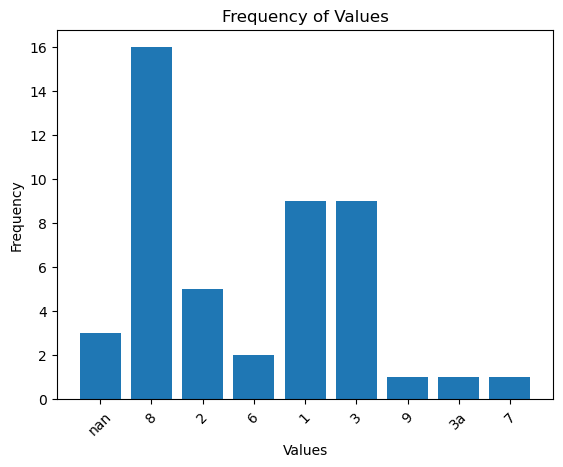

In [25]:
plt.bar(df1.iloc[0,17].keys(), df1.iloc[0,17].values())

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [26]:
df = df1[['strategyfreq_dict']]

In [27]:
def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)

# Выводим DataFrame с новыми столбцами
df.head()

,1,11,1а,2,22,2а,3,33,3a,3а,...,4,4а,5,6,66,7,8,9,nan,strategyfreq_dict
ID,,,,,,,,,,,,,,,,,,,,,
pr_A_1,9.0,NaN,NaN,5.0,NaN,NaN,9.0,NaN,NaN,1.0,...,NaN,NaN,NaN,2.0,NaN,1.0,16,1.0,3,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,10.0,NaN,NaN,3.0,NaN,NaN,7.0,NaN,NaN,5.0,...,2.0,NaN,NaN,NaN,NaN,2.0,22,NaN,3,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,5.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,36,NaN,3,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,13.0,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,33,1.0,3,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 13, '..."
pr_I_1,3.0,NaN,1.0,1.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2.0,34,1.0,3,"{'nan': 3, '8': 34, '1': 3, '3': 5, '7': 2, '9..."


In [28]:
df = df.fillna(0)
df.columns

Index(['1', '11', '1а', '2', '22', '2а', '3', '33', '3a', '3а', '3а’', '4',
       '4а', '5', '6', '66', '7', '8', '9', 'nan', 'strategyfreq_dict'],
      dtype='object')

In [29]:
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

In [30]:
#df = df.drop(['nan'])
df.columns
df = df.drop(['nan'], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,strategyfreq_dict
ID,,,,,,,,,,
pr_A_1,9.0,5.0,10.0,0.0,0.0,2.0,1.0,16,1.0,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,10.0,3.0,12.0,2.0,0.0,0.0,2.0,22,0.0,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,5.0,1.0,7.0,0.0,1.0,0.0,2.0,36,0.0,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,13.0,1.0,4.0,0.0,0.0,0.0,3.0,33,1.0,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 13, '..."
pr_I_1,4.0,1.0,5.0,0.0,0.0,1.0,2.0,34,1.0,"{'nan': 3, '8': 34, '1': 3, '3': 5, '7': 2, '9..."


Стратегии вытянуты

In [31]:
df = df.drop(['strategyfreq_dict'], axis = 1)


In [32]:
df['strat_sum'] = df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6'] + df['7'] + df['8'] + df['9']


In [33]:
dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
pr_A_1,0.204545,0.113636,0.227273,0.000000,0.000000,0.045455,0.022727,0.363636,0.022727
pr_B_1,0.196078,0.058824,0.235294,0.039216,0.000000,0.000000,0.039216,0.431373,0.000000
pr_E_1,0.096154,0.019231,0.134615,0.000000,0.019231,0.000000,0.038462,0.692308,0.000000
pr_G_1,0.236364,0.018182,0.072727,0.000000,0.000000,0.000000,0.054545,0.600000,0.018182
pr_I_1,0.083333,0.020833,0.104167,0.000000,0.000000,0.020833,0.041667,0.708333,0.020833


In [34]:
dfabsfreq = df.copy()

In [35]:
dff.iloc[0,0]

0.20454545454545456

dff - композиционный данные, представлены в виде частот. 

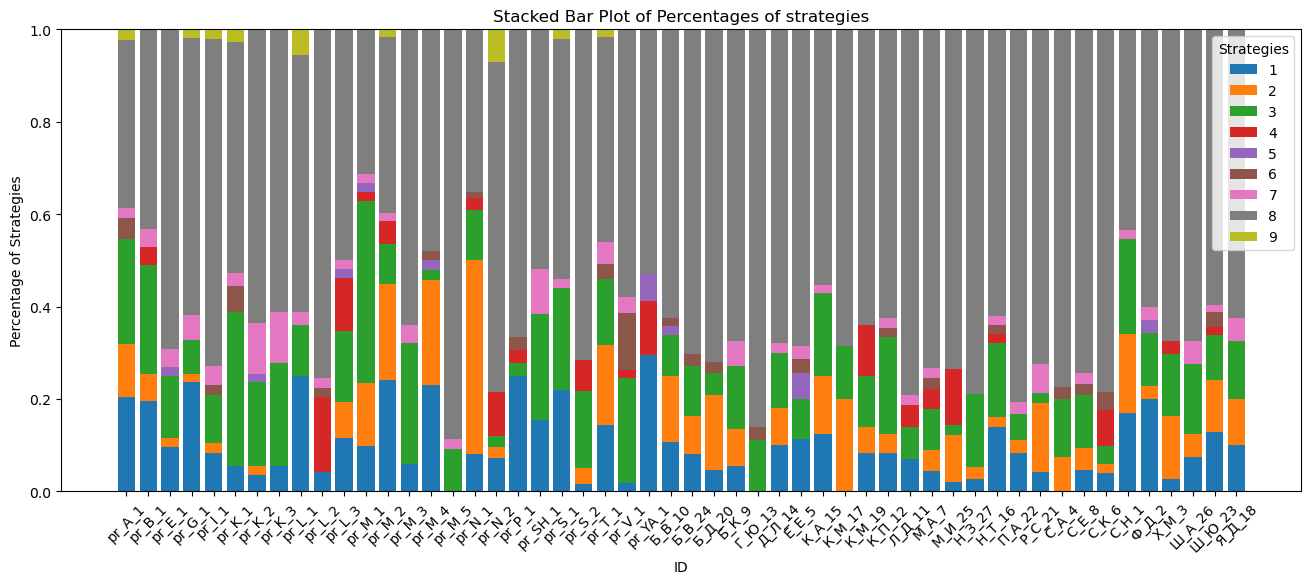

In [36]:
# Plotting the stacked bar plot
plt.figure(figsize=(16, 6))
#plt.bar(dff.index, df['1'], label='1')
#bottom = dff['1']
bottom = 0
for col in dff.columns[0:]:
    plt.bar(dff.index, dff[col], bottom=bottom, label=col)
    bottom += dff[col]
plt.xlabel('ID')
plt.ylabel('Percentage of Strategies')
plt.title('Stacked Bar Plot of Percentages of strategies')
plt.legend(title='Strategies')
plt.xticks(rotation=45)
plt.show()

In [37]:
dff['type'] = df1['type']
centerians_freqs = dff[dff['type']=='centenarians']
students_freqs = dff[dff['type']=='students']


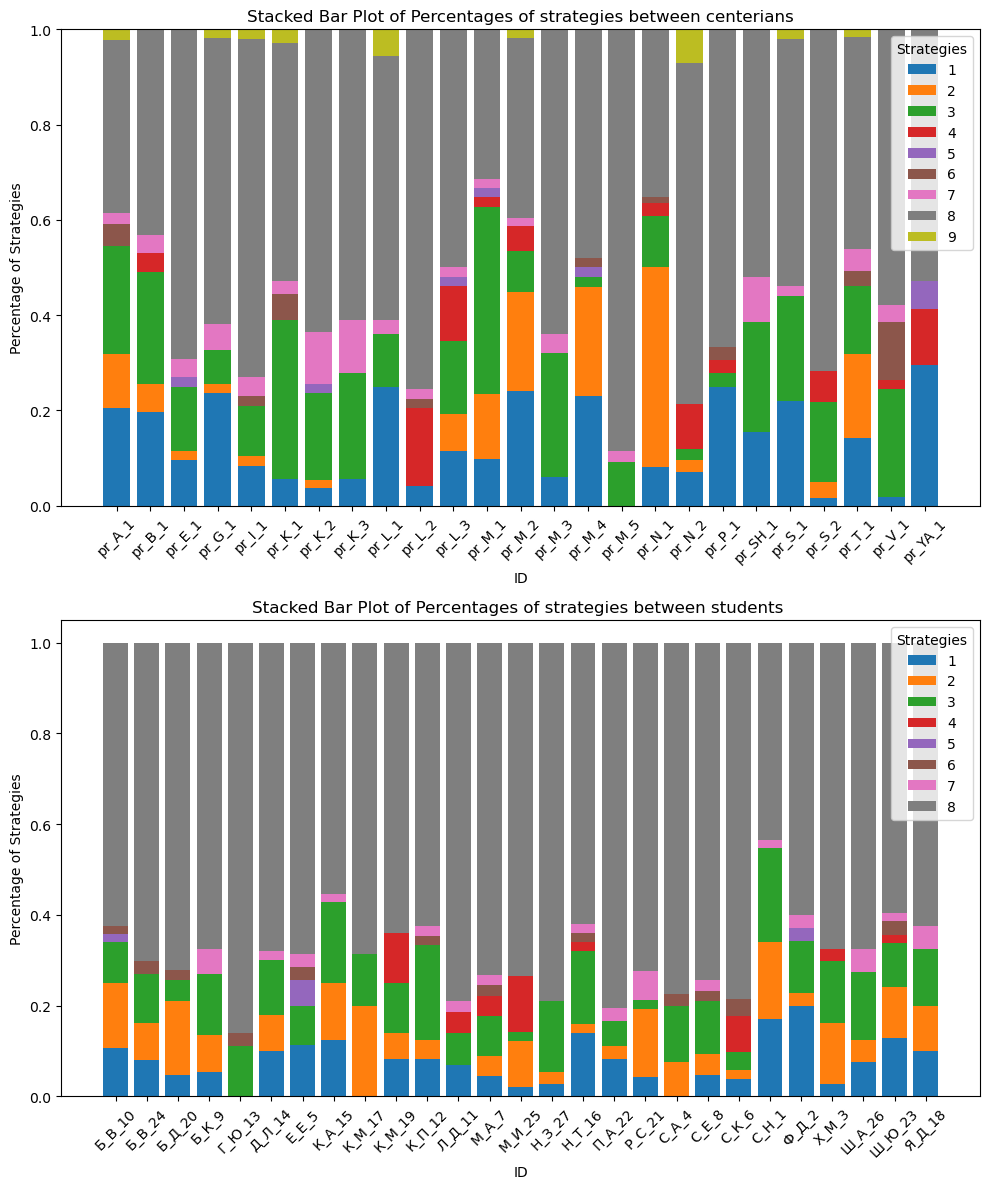

In [38]:
# Plotting the stacked bar plot
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

bottom = 0
for col in centerians_freqs.columns[0:9]:
    ax[0].bar(centerians_freqs.index, centerians_freqs[col], bottom=bottom, label=col)
    bottom += centerians_freqs[col]
ax[0].set_xlabel('ID')
ax[0].set_ylabel('Percentage of Strategies')
ax[0].set_title('Stacked Bar Plot of Percentages of strategies between centerians')
ax[0].legend(title='Strategies')
ax[0].tick_params(axis='x', rotation=45)

bottom = 0
for col in students_freqs.columns[0:8]:
    ax[1].bar(students_freqs.index, students_freqs[col], bottom=bottom, label=col)
    bottom += students_freqs[col]
ax[1].set_xlabel('ID')
ax[1].set_ylabel('Percentage of Strategies')
ax[1].set_title('Stacked Bar Plot of Percentages of strategies between students ')
ax[1].legend(title='Strategies')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Можно поставить гипотезу, что студенты чаще пользуются стратегией 2, проф пользуются 9, проф чаще стратегией 1. Есть еще вариант сделать логнормальную трансформацию, и сравнивать уже распределения

In [39]:
df1.head()

,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategyfreq_dict
ID,,,,,,,,,,,,,,,,,,
pr_A_1,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[папа, пошел, пришел, пришить, привезти, прико...","[nan, [папа, пошел], [пошел, пришел], [пришел,...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 2, 2, 2, 2, 8, 6, 8, 8, 1, 1, 8, 3, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 587,2, 523,3, 5,9, 82, 2,2, 2,4, 27,2,...","[nan, 0,37, 2,12, 8,12, 0,38, 3,53, 2,62, 2,01...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...",47,15,13,19,"2,861590909",centenarians,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...","[по, прилетел, пошел, поел, пахал, папа, певец...","[nan, [по, прилетел], [прилетел, пошел], [поше...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 3, 8, 2, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5790,8, 24,4, 587,2, 18,3, 9,2, 143,4, 28,4, ...","[nan, 0,01, 0,01, 0,01, 1,66, 0,89, 1,24, 2,2,...","[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, ...",54,18,16,20,"2,68627451",centenarians,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[педагог, предмет, полочка, пушка, портфель, п...","[nan, [педагог, предмет], [предмет, полочка], ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 7, 3, 8, 8, 3, 3, 8, 8, 8, 8, 3, 8, 1, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[27,1, 154,4, 5,9, 24,6, 31,2, 29,7, 1,6, 51,7...","[nan, 0,01, 0,54, 0,72, 2,82, 1,21, 0,75, 1,66...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",55,24,12,19,"2,7475",centenarians,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[помидор, память, папа, последовательность, пр...","[nan, [помидор, память], [память, папа], [папа...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 7, 3, 8, 8, 1, 8, 3, 3, 1, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[15,4, 174,5, 143,4, 32,2, 371,7, 89,3, 51,7, ...","[nan, 0,01, 0,38, 0,72, 0,35, 0,01, 0,92, 1,14...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",58,16,18,24,"2,238181818",centenarians,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 13, '..."
pr_I_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[правда, поле, полис, путешествие, погода, пра...","[nan, [правда, поле], [поле, полис], [полис, п...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 1, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[428,5, 180,2, 6,8, 42,4, 51,7, 12,6, 3,6, 55,...","[nan, 0,23, 0,64, 1,16, 0,27, 3,05, 1,55, 2,17...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",51,23,11,17,"2,9675",centenarians,"{'nan': 3, '8': 34, '1': 3, '3': 5, '7': 2, '9..."


In [40]:
dff.drop(['type'], axis =1)

,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
pr_A_1,0.204545,0.113636,0.227273,0.000000,0.000000,0.045455,0.022727,0.363636,0.022727
pr_B_1,0.196078,0.058824,0.235294,0.039216,0.000000,0.000000,0.039216,0.431373,0.000000
pr_E_1,0.096154,0.019231,0.134615,0.000000,0.019231,0.000000,0.038462,0.692308,0.000000
pr_G_1,0.236364,0.018182,0.072727,0.000000,0.000000,0.000000,0.054545,0.600000,0.018182
pr_I_1,0.083333,0.020833,0.104167,0.000000,0.000000,0.020833,0.041667,0.708333,0.020833
pr_K_1,0.055556,0.000000,0.333333,0.000000,0.000000,0.055556,0.027778,0.500000,0.027778
pr_K_2,0.036364,0.018182,0.181818,0.000000,0.018182,0.000000,0.109091,0.636364,0.000000
pr_K_3,0.055556,0.000000,0.222222,0.000000,0.000000,0.000000,0.111111,0.611111,0.000000
pr_L_1,0.250000,0.000000,0.111111,0.000000,0.000000,0.000000,0.027778,0.555556,0.055556


In [41]:
#df_log_transformed = np.log(dff.drop(['type'], axis =1))
# Применяем логарифмическую трансформацию с добавлением небольшой константы ко всем значениям в DataFrame
#df_log_transformed = np.log(df + 1e-10)  # Добавляем маленькую константу 1e-10 перед применением логарифма


# Применяем логарифмическую трансформацию с добавлением единицы ко всем значениям в DataFrame
df_log_transformed = np.log(dff.drop(['type'] , axis =1) * 60 + 1e-10)


In [42]:
df_log_transformedfromabs = np.log(dfabsfreq.drop(['strat_sum'], axis =1) + 1e-10)

In [43]:
df_percent = dff.drop(['type'], axis =1) * 100
df_percent.head()

,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
pr_A_1,20.454545,11.363636,22.727273,0.000000,0.000000,4.545455,2.272727,36.363636,2.272727
pr_B_1,19.607843,5.882353,23.529412,3.921569,0.000000,0.000000,3.921569,43.137255,0.000000
pr_E_1,9.615385,1.923077,13.461538,0.000000,1.923077,0.000000,3.846154,69.230769,0.000000
pr_G_1,23.636364,1.818182,7.272727,0.000000,0.000000,0.000000,5.454545,60.000000,1.818182
pr_I_1,8.333333,2.083333,10.416667,0.000000,0.000000,2.083333,4.166667,70.833333,2.083333


In [44]:
y = dff[['type']]
X = df_percent.copy()

<Axes: >

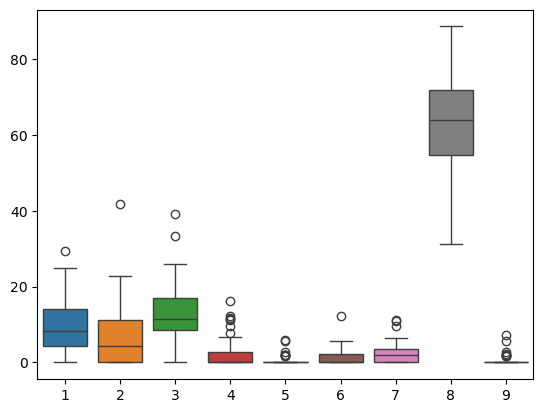

In [45]:
sns.boxplot(X)

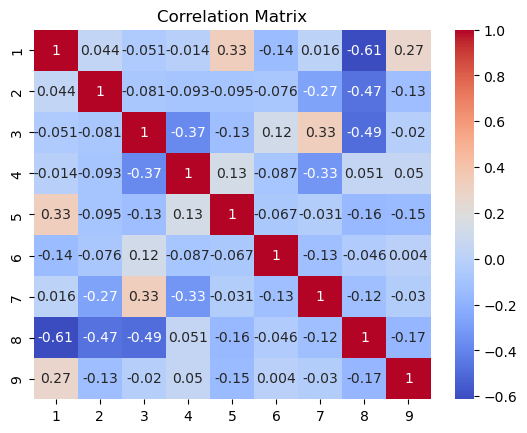

In [47]:
# возможная связь стратегий
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## ```Clustering```

In [46]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, v_measure_score, completeness_score

In [48]:
def plot_tsne(data, n_iter=1000, 
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: 
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """
    
    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)
    
    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа, 
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=2, init=pca_embedding[:, :2], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity)
    tsne_embedding = tnse.fit_transform(pca_embedding)
    
    sns.scatterplot(x=tsne_embedding[:, 0],
                    y=tsne_embedding[:, 1],
                    hue=color, palette="colorblind")
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)
    
    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными
    
    return tsne_embedding

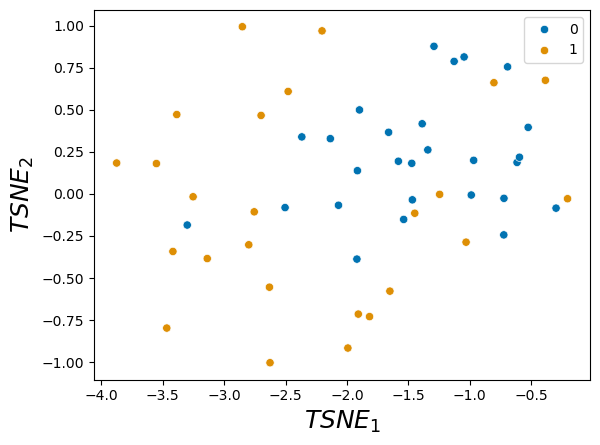

In [80]:
labels_cent_true = list(y['type']=='centenarians')
labels_cent_true = np.int32(labels_cent_true)
#labels_cent_true
tsne_res = plot_tsne(X, color = labels_cent_true)

In [53]:
def algorithm_selection(X, k, distances, linkages):
    """
    Для заданных алгоримов кластеризации и гиперпараметров 
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния
        :param linkages: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации
    :return compare_dataframe: таблица с метриками кластеризации
    """
    compare_dataframe = pd.DataFrame(columns=['Algorithm', 'Distance', 'Linkage', 'number_of_clusters', 'Silhouette'])

    # K-средних
    for linkage in linkages:
        

        for distance in distances:
            for n_of_clusters in k:
                kmeans = KMeans(n_clusters=n_of_clusters, random_state=42)
                cluster_labels = kmeans.fit_predict(X)
                silhouette = silhouette_score(X, cluster_labels)

                res_tmp = pd.DataFrame({'Algorithm': ['KMeans'],
                                        'Distance': [distance],
                                        'Linkage': [linkage],
                                        'number_of_clusters' : [n_of_clusters],
                                        'Silhouette': [silhouette]})
                compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)

    # Агломеративная кластеризация
    for linkage in linkages:
        # Run clustering model with current parameter set and add results to DataFrame
        if linkage == 'ward':
            for n_of_clusters in k:    
                hier_model = AgglomerativeClustering(n_clusters=n_of_clusters, metric='euclidean', linkage=linkage)
                cluster_labels = hier_model.fit_predict(X)

                silhouette = silhouette_score(X, cluster_labels)

                res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                        'Distance': ['euclidean'],
                                        'Linkage': 'ward',
                                        'number_of_clusters' : [n_of_clusters],
                                        'Silhouette': [silhouette]})
                compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)    
        else: 
            for distance in distances:
                for n_of_clusters in k:
                    hier_model = AgglomerativeClustering(n_clusters=n_of_clusters, metric=distance, linkage=linkage)
                    cluster_labels = hier_model.fit_predict(X)

                    silhouette = silhouette_score(X, cluster_labels)

                    res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                            'Distance': [distance],
                                            'Linkage': [linkage],
                                            'number_of_clusters' : [n_of_clusters],
                                            'Silhouette': [silhouette]})
                    compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)            
                
    return compare_dataframe

In [54]:
distances = ['chebyshev', 'manhattan', 'euclidean', 'cosine']
algorithms = ['average', 'single', 'complete', 'ward']
metrics = [silhouette_score]
number_of_clusters = np.arange(2,7)
result_df = algorithm_selection(X, distances=distances, linkages=algorithms, k=number_of_clusters)

/tmp/ipykernel_14797/1258080711.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)


In [56]:
result_df.sort_values(by = 'Silhouette', ascending=False)

,Algorithm,Distance,Linkage,number_of_clusters,Silhouette
105,Agglomerative,manhattan,single,2,0.451914
100,Agglomerative,chebyshev,single,2,0.451914
110,Agglomerative,euclidean,single,2,0.451914
80,Agglomerative,chebyshev,average,2,0.451914
115,Agglomerative,cosine,single,2,0.451914
...,...,...,...,...,...
114,Agglomerative,euclidean,single,6,0.162541
119,Agglomerative,cosine,single,6,0.162541
113,Agglomerative,euclidean,single,5,0.133500
103,Agglomerative,chebyshev,single,5,0.133500


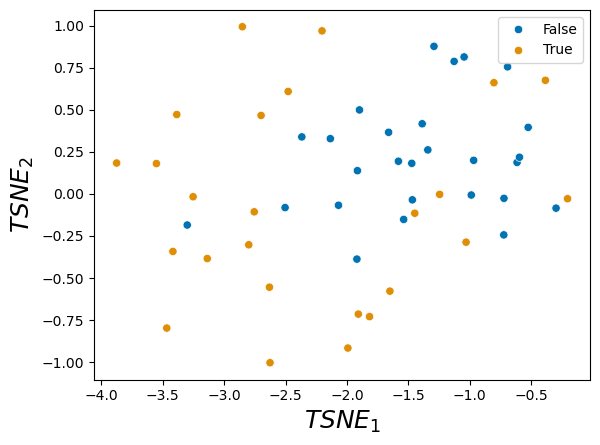

In [74]:
model = AgglomerativeClustering(n_clusters=2, linkage='single', metric='manhattan')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=labels_cent_true)

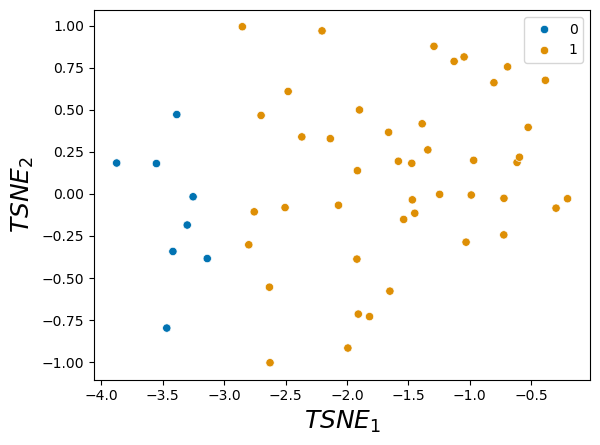

In [84]:
 #metric='euclidean', linkage='ward'

model = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=cluster_labels)

In [87]:
def algorithm_selection(X, y_true, k, distances, linkages, metrics=None):
    """
    Для заданных алгоримов кластеризации и гиперпараметров 
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния
        :param linkages: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации
    :return compare_dataframe: таблица с метриками кластеризации
    """
    compare_dataframe = pd.DataFrame(columns=['Algorithm', 'Distance', 'Linkage', 'Homogeneity', 'Completeness', 'V-measure', 'Silhouette'])

    # K-средних
    for linkage in linkages:
        for distance in distances:
            kmeans = KMeans(n_clusters=k, random_state=42)
            cluster_labels = kmeans.fit_predict(X)
    
            homogeneity = homogeneity_score(y_true, cluster_labels)
            completeness = completeness_score(y_true, cluster_labels)
            v_measure = v_measure_score(y_true, cluster_labels)
            silhouette = silhouette_score(X, cluster_labels)

            res_tmp = pd.DataFrame({'Algorithm': ['KMeans'],
                                    'Distance': [distance],
                                    'Linkage': [linkage],
                                    'Homogeneity': [homogeneity],
                                    'Completeness': [completeness],
                                    'V-measure': [v_measure],
                                    'Silhouette': [silhouette]})
            compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)
    # Агломеративная кластеризация
    for linkage in linkages:
        for distance in distances:
            hier_model = AgglomerativeClustering(n_clusters=k, metric=distance, linkage=linkage)
            cluster_labels = hier_model.fit_predict(X)

            homogeneity = homogeneity_score(y_true, cluster_labels)
            completeness = completeness_score(y_true, cluster_labels)
            v_measure = v_measure_score(y_true, cluster_labels)
            silhouette = silhouette_score(X, cluster_labels)

            res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                    'Distance': [distance],
                                    'Linkage': [linkage],
                                    'Homogeneity': [homogeneity],
                                    'Completeness': [completeness],
                                    'V-measure': [v_measure],
                                    'Silhouette': [silhouette]})
            compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)            
    # DBSCAN
    for distance in distances:
        dbscan = DBSCAN(eps=0.5, metric=distance)
        cluster_labels = dbscan.fit_predict(X)

        homogeneity = homogeneity_score(y_true, cluster_labels)
        completeness = completeness_score(y_true, cluster_labels)
        v_measure = v_measure_score(y_true, cluster_labels)
        #silhouette = silhouette_score(X, cluster_labels)

        res_tmp = pd.DataFrame({'Algorithm': ['DBSCAN'],
                                'Distance': [distance],
                                'Linkage': ['N/A'],
                                'Homogeneity': [homogeneity],
                                'Completeness': [completeness],
                                'V-measure': [v_measure],
                                'Silhouette': ['nan']})
        compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)
                
    return compare_dataframe

In [89]:
distances = ['chebyshev', 'manhattan', 'euclidean', 'cosine']
algorithms = ['average', 'single', 'complete']
metrics = [silhouette_score]
number_of_clusters = np.arange(2,7)
result_df = algorithm_selection(X,y_true=labels_cent_true, distances=distances, linkages=algorithms, k=2)

/tmp/ipykernel_14797/2742296595.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)


In [92]:
result_df.sort_values(by=['V-measure', 'Silhouette'], ascending=False)

,Algorithm,Distance,Linkage,Homogeneity,Completeness,V-measure,Silhouette
22,Agglomerative,euclidean,complete,0.212627,0.261809,0.234669,0.372346
20,Agglomerative,chebyshev,complete,0.188914,0.217730,0.202301,0.28354
0,KMeans,chebyshev,average,0.140742,0.151078,0.145727,0.356622
1,KMeans,manhattan,average,0.140742,0.151078,0.145727,0.356622
2,KMeans,euclidean,average,0.140742,0.151078,0.145727,0.356622
3,KMeans,cosine,average,0.140742,0.151078,0.145727,0.356622
4,KMeans,chebyshev,single,0.140742,0.151078,0.145727,0.356622
5,KMeans,manhattan,single,0.140742,0.151078,0.145727,0.356622
6,KMeans,euclidean,single,0.140742,0.151078,0.145727,0.356622
7,KMeans,cosine,single,0.140742,0.151078,0.145727,0.356622


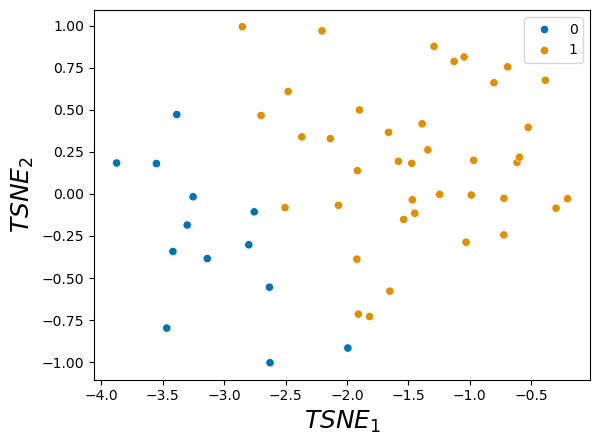

In [93]:
model = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=cluster_labels)

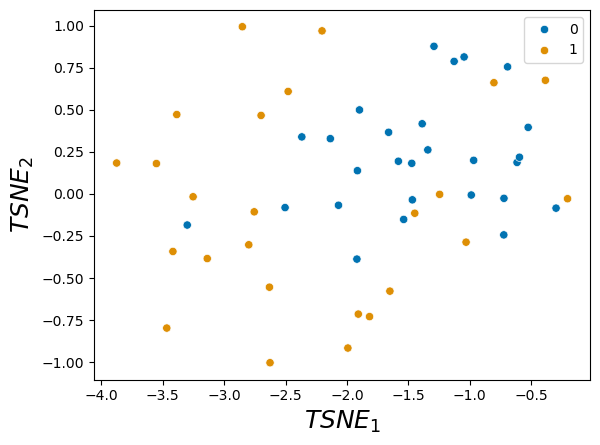

In [94]:
tsne_res = plot_tsne(X, color=labels_cent_true)

In [97]:
#Случайный лес
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#X, y = labeled_fc_data[labeled_fc_data.columns[labeled_fc_data.columns != 'Population']], labeled_fc_data['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=3, n_estimators=3, random_state=111)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Оценка качества модели с использованием F1-score
f1 = f1_score(y_test, y_test_predict, average='macro')
print("F1-score (macro):", f1)
print(f'Train f1: \n{classification_report(y_train, y_train_predict)}')
print(f'Test f1: \n{classification_report(y_test, y_test_predict)}')

F1-score (macro): 0.905982905982906
Train f1: 
              precision    recall  f1-score   support

centenarians       0.94      0.79      0.86        19
    students       0.84      0.95      0.89        22

    accuracy                           0.88        41
   macro avg       0.89      0.87      0.88        41
weighted avg       0.89      0.88      0.88        41

Test f1: 
              precision    recall  f1-score   support

centenarians       0.86      1.00      0.92         6
    students       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Попытка в визуальный анализ - виолинплот например

<Axes: >

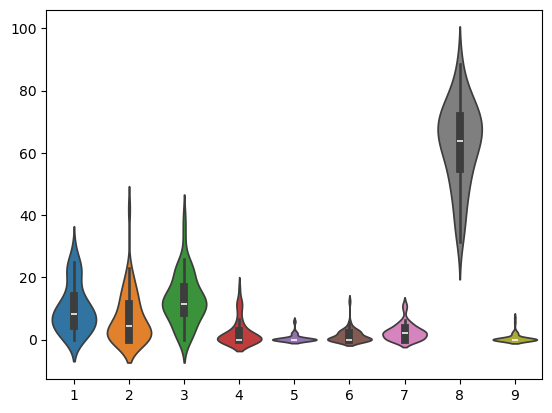

In [100]:
sns.violinplot(X)